In [1]:
import numpy as np
from pointpattern import PointPattern
%matplotlib inline
import matplotlib.pyplot as plt
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [2]:
from centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance

In [3]:
pp = PointPattern(points)
hull(pp.points)

array([[ 31.01,  81.21],
       [  8.23,  39.93],
       [  9.47,  31.02],
       [ 22.52,  22.39],
       [ 54.46,   8.48],
       [ 79.26,   7.68],
       [ 89.78,  42.53],
       [ 98.73,  77.17],
       [ 65.19,  92.08]])

In [4]:
std_distance(pp.points)

40.149806489086707

In [5]:
points=[
[20, 40],
[30, 60],
[34, 52],
[40, 40],
[44, 42],
[48, 62],
[50, 10],
[60, 50],
[90, 90]]

def median_center(points, crit=0.0001):
    points = np.asarray(points)
    x0, y0 = points.mean(axis=0)
    dx = np.inf
    dy = np.inf
    while np.abs(dx) > crit or np.abs(dy) > crit:
        xd = points[:, 0] - x0
        yd = points[:, 1] - y0
        d = np.sqrt(xd*xd + yd*yd)
        w = 1./d
        w = w / w.sum()
        x1 = w * points[:, 0]
        x1 = x1.sum()
        y1 = w * points[:, 1]
        y1 = y1.sum()
        dx = x1 - x0
        dy = y1 - y0
        print x0, x1, dx, dy, d.sum()
        x0 = x1
        y0 = y1
        
     
    return x1, y1

In [6]:

median_center(points, crit=.0001)

46.2222222222 43.4156087005 -2.8066135217 -1.20877571085 204.637413484
43.4156087005 42.3309261827 -1.08468251777 -0.806087956254 200.588247869
42.3309261827 41.9755379602 -0.355388222503 -0.443664211165 199.751143748
41.9755379602 41.8825678023 -0.0929701579145 -0.246333683427 199.594021004
41.8825678023 41.8715766851 -0.0109911172705 -0.145803379099 199.557470852
41.8715766851 41.8814774739 0.00990078884972 -0.0911700320835 199.545444412
41.8814774739 41.8937799712 0.0123024973036 -0.0590092802002 199.540567462
41.8937799712 41.9038627399 0.0100827687129 -0.0389366688186 199.538434246
41.9038627399 41.911216553 0.00735381310715 -0.0259581156001 199.537478977
41.911216553 41.9163430615 0.00512650849704 -0.0174004187261 199.537047756
41.9163430615 41.9198489198 0.00350585829874 -0.0116980869659 199.53685242
41.9198489198 41.9222266467 0.00237772685275 -0.00787701149783 199.536763771
41.9222266467 41.9238336153 0.00160696862095 -0.00530877688863 199.536723492
41.9238336153 41.924918173 

(41.927122752255215, 46.436674862375746)

In [7]:
mean_center(points)

array([ 46.22222222,  49.55555556])

In [8]:
manhattan_median(points)

array([ 44.,  50.])

In [9]:
from scipy.optimize import minimize
def web(coord, points):
    points = np.asarray(points)
    xd = points[:, 0] - coord[0]
    yd = points[:, 1] - coord[1]
    d = np.sqrt(xd*xd + yd*yd).sum()
    return d


In [10]:
web([41.92, 46.43], points)

199.53671029996573

In [11]:
res = minimize(web, (43.71, 42.74), args=points)

In [12]:
res['x']

array([ 41.92717666,  46.43653589])

In [13]:
from centrography import euclidean_median
emc = euclidean_median(points).tolist()
emc

[41.92717244268814, 46.43653104681432]

In [14]:
from centrography import ellipse

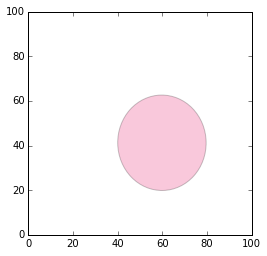

In [15]:
sx, sy, theta = ellipse(pp.points)
sx, sy, theta
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=(59.8, 41.23), width=sx, height=sy, angle = theta)

ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_alpha(rand())
e.set_facecolor(rand(3))
ax.set_xlim(0,100)
ax.set_ylim(0,100)

show()

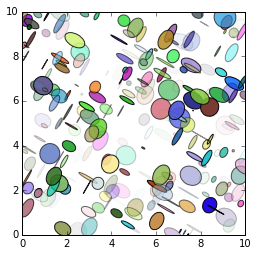

In [16]:
from pylab import figure, show, rand
from matplotlib.patches import Ellipse

NUM = 250

#ells = [Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=rand()*360)
#        for i in range(NUM)]
ells = [Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=-30)
        for i in range(NUM)]


fig = figure()
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rand())
    e.set_facecolor(rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

show()

In [17]:
mean_center(pp.points)

array([ 52.57166667,  46.17166667])

In [18]:
manhattan_median(pp.points)

centrography.py:80: UserWarning: Manhattan Median is not unique for even point patterns.
  warnings.warn(s)


array([ 59.825,  41.23 ])

In [19]:
np.median(points, axis=0)

array([ 44.,  50.])

In [20]:
points = np.array(points)

In [21]:
points

array([[20, 40],
       [30, 60],
       [34, 52],
       [40, 40],
       [44, 42],
       [48, 62],
       [50, 10],
       [60, 50],
       [90, 90]])

In [22]:
weights = np.arange(12)
wmc = weighted_mean_center(pp.points, weights)
wmc
med = manhattan_median(pp.points)
mc = mean_center(pp.points)

In [23]:
weights

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
pp.points

,x,y
0,66.22,32.54
1,22.52,22.39
2,31.01,81.21
3,9.47,31.02
4,30.78,60.10
5,75.21,58.93
6,79.26,7.68
7,8.23,39.93
8,98.73,77.17
9,89.78,42.53


/Users/serge/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


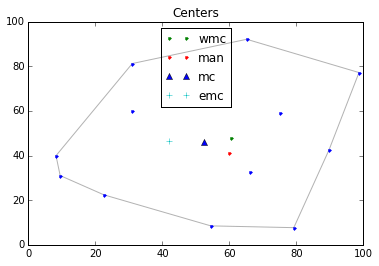

In [25]:
pp.plot(title='Centers', hull=True )
plt.plot(wmc[0], wmc[1], 'g.', label='wmc')
plt.plot(med[0], med[1], 'r.', label='man')
plt.plot(mc[0], mc[1], 'b^', label='mc')
plt.plot(emc[0], emc[1], 'c+', label='emc')
plt.legend(loc=0)



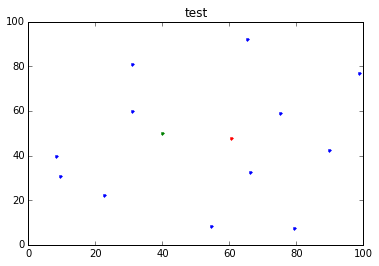

In [26]:
ax = pp.plot(title='test', get_ax=True)
ax.plot(wmc[0], wmc[1], 'r.')
ax.plot(40,50, 'g.')


In [27]:
from centrography import dtot
for c in med, mc, emc:
    print(dtot(c, pp.points))
    

468.982750983
466.244790744
476.381554886


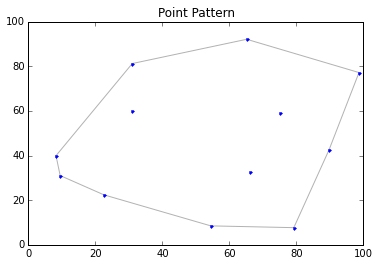

In [28]:
pp.plot(hull=True)

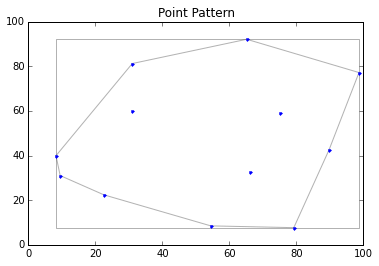

In [29]:
pp.plot(hull=True, window=True)

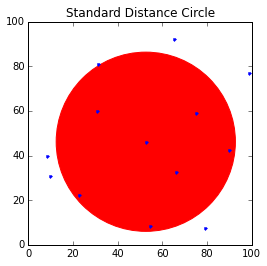

In [30]:
stdd = std_distance(pp.points)
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b.', label='mc')
ax.set_aspect('equal')


#plt.xlim(-100,100)
#plt.ylim(-100,100)

#plt.show()


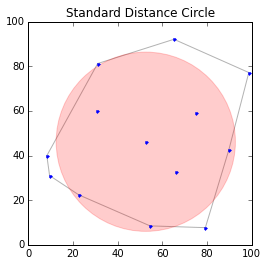

In [31]:
stdd = std_distance(pp.points)
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r',alpha=0.2)
ax = pp.plot(get_ax=True, title='Standard Distance Circle', hull=True)
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b.', label='mc')
ax.set_aspect('equal')


#plt.xlim(-100,100)
#plt.ylim(-100,100)

#plt.show()


In [32]:
pp.hull

array([[ 31.01,  81.21],
       [  8.23,  39.93],
       [  9.47,  31.02],
       [ 22.52,  22.39],
       [ 54.46,   8.48],
       [ 79.26,   7.68],
       [ 89.78,  42.53],
       [ 98.73,  77.17],
       [ 65.19,  92.08]])

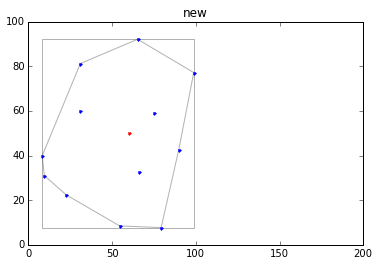

In [33]:
ax = pp.plot(hull=True, window=True, get_ax=True)
ax.set_xlim(0,200)
ax.plot(60,50,'r.')
plt.title('new')

In [34]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 u'_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_axisbg',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_lod',
 '_make_twin_axes',
 '_navigate',
 '_navigate_mode',
 '_oid',
 '_originalPosition',
 '_path_effects',
 '_pcolorargs',
 '_picker',
 '_position',
 '_process_unit_info',
 '_propobservers',
 '_rasteri

In [35]:
pp

In [36]:
pp.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112
       x      y
0  66.22  32.54
1  22.52  22.39
2  31.01  81.21
3   9.47  31.02
4  30.78  60.10


In [37]:

pp.points

,x,y
0,66.22,32.54
1,22.52,22.39
2,31.01,81.21
3,9.47,31.02
4,30.78,60.10
5,75.21,58.93
6,79.26,7.68
7,8.23,39.93
8,98.73,77.17
9,89.78,42.53


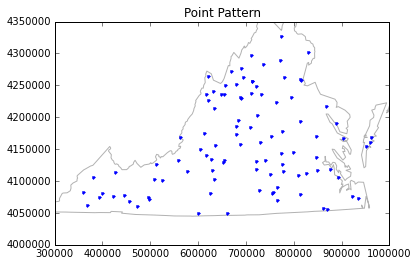

In [38]:
from pysal.contrib import shapely_ext
from process import PoissonPointProcess as csr
import pysal as ps
from window import as_window
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)
pp = csr(as_window(state), 100, 1, asPP=True).realizations[0]
pp.plot(window=True)

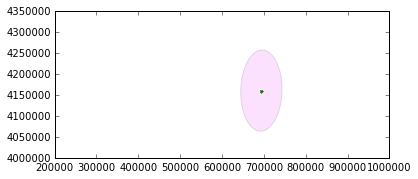

In [39]:
mc = mean_center(pp.points)
sx, sy, theta = ellipse(pp.points)
sx, sy, theta
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mc, width=sx, height=sy, angle = -theta)

ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_alpha(rand())
e.set_facecolor(rand(3))
ax.set_xlim(200000, 1000000)
ax.set_ylim(4000000, 4350000)
plt.plot(mc[0], mc[1], 'g.')

show()

In [40]:
sx, sy, theta

(98726.22867841406, 193982.79492030802, 1.4051209790721915)

In [41]:
x0, y0, x1, y1 = pp.window.bbox

In [42]:
(x1-x0 )/ (y1-y0)

2.284710569775765

In [43]:
sx, sy

(98726.22867841406, 193982.79492030802)

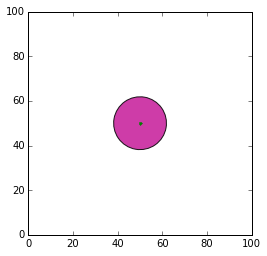

(23.664319132398468, 23.664319132398465, -0.78539816339744828)

In [44]:
xy = np.asarray([ (20,50), (50, 20), (25,85), (85,25), (50, 50)])
sx, sy, theta = ellipse(xy)
sx, sy, theta
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=(50,50), width=sx, height=sy, angle = -190)

ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_alpha(rand())
e.set_facecolor(rand(3))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.plot(50, 50, 'g.')

show()
sx, sy, theta

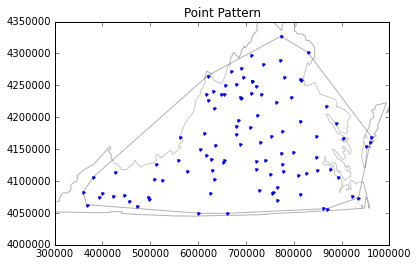

In [45]:
pp.plot(window=True, hull=True)

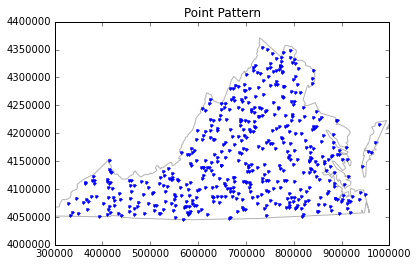

In [46]:
pp = csr(as_window(state), 500, 1, asPP=True).realizations[0]
pp.plot(window=True)

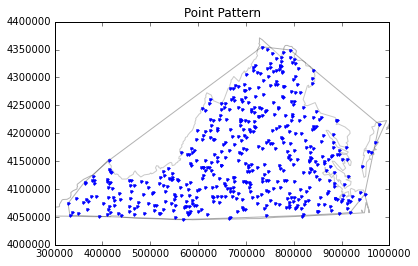

In [47]:
pp.plot(window=True, hull=True)

In [48]:
med = manhattan_median(pp.points)
mc = mean_center(pp.points)
emc = euclidean_median(pp.points)

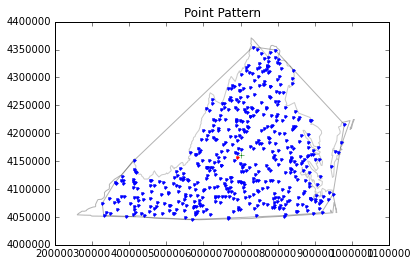

In [49]:
pp.plot(window=True, hull=True)
plt.plot(mc[0], mc[1], 'r.', label='mc')
plt.plot(emc[0], emc[1], 'g+', label='emc')



In [50]:
print dtot(mc, pp.points)
print dtot(emc, pp.points)

72282592.373
72142385.126
